In [4]:
from pathlib import Path
import pandas as pd

# Set the base path to your project root or the location of your Jupyter notebook
base_path = Path().resolve()  # Adjust this if the notebook is not in the project root

# Define the path to inference data
inference_data_path = base_path / "src/salespredictor/processed_data/inference_data.csv"

# Load the data
try:
    inference_data = pd.read_csv(inference_data_path)
    inference_data.head()
except FileNotFoundError:
    print(f"File not found at {inference_data_path}. Please check the path.")


File not found at C:\Users\bgi347\Desktop\Anand\AI_Sales_Project\research\src\salespredictor\processed_data\inference_data.csv. Please check the path.


In [6]:
import pandas as pd
from pathlib import Path

# Define the path to the inference data
inference_data_path = Path("AI_SALES_PROJECT/processed_data/inference_data.csv")

# Load the data
try:
    inference_data = pd.read_csv(inference_data_path)
    display(inference_data.head())  # Display the first few rows of the DataFrame
except FileNotFoundError:
    print(f"File not found at {inference_data_path}. Please check the path.")


File not found at AI_SALES_PROJECT\processed_data\inference_data.csv. Please check the path.


In [9]:
import pandas as pd
from pathlib import Path

# Define the absolute path to the inference data
inference_data_path = Path("C:/Users/bgi347/Desktop/Anand/AI_Sales_Project/processed_data/train_data.csv")

# Load the data
try:
    inference_data = pd.read_csv(inference_data_path)
    display(inference_data.head())  # Display the first few rows of the DataFrame
except FileNotFoundError:
    print(f"File not found at {inference_data_path}. Please check the path.")


,actual_price,rating,rating_count,category,discounted_price
0,1099.0,4.2,348.217791,10,399.0
1,349.0,4.0,348.217791,10,199.0
2,1899.0,3.9,348.217791,10,199.0
3,699.0,4.2,348.217791,10,329.0
4,399.0,4.2,348.217791,10,154.0


In [25]:
import sys
from pathlib import Path

# Add the project root to the Python path
project_root = Path().resolve().parent  # Adjust if the notebook is not in the root
sys.path.append(str(project_root))

In [26]:
# Imports for all components
from src.salespredictor.components.data_ingestion import load_data
from src.salespredictor.components.data_processing import clean_and_preprocess_data
from src.salespredictor.components.model_training import load_train_data, train_models, evaluate_models, save_best_model
from src.salespredictor.components.model_inference import load_model, make_predictions
import pandas as pd
import joblib


In [55]:
# Load raw data
raw_data = load_data("research/Data/amazon.csv")
print("Raw Data Sample:")
display(raw_data.head())
len(raw_data)

Raw Data Sample:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


1465

In [28]:
# Preprocess data for training
train_data = clean_and_preprocess_data(raw_data, is_training=True)

# Preprocess data for inference (only features)
inference_data = clean_and_preprocess_data(raw_data, is_training=False)

print("Train Data Sample:")
display(train_data.head())
print("Inference Data Sample:")
display(inference_data.head())


Train Data Sample:


,actual_price,rating,rating_count,category,discounted_price
0,1099.0,4.2,348.217791,10,399.0
1,349.0,4.0,348.217791,10,199.0
2,1899.0,3.9,348.217791,10,199.0
3,699.0,4.2,348.217791,10,329.0
4,399.0,4.2,348.217791,10,154.0


Inference Data Sample:


,actual_price,rating,rating_count,category
0,1099.0,4.2,348.217791,10
1,349.0,4.0,348.217791,10
2,1899.0,3.9,348.217791,10
3,699.0,4.2,348.217791,10
4,399.0,4.2,348.217791,10


In [36]:
# Load raw data
raw_data = load_data("research/Data/amazon.csv")

# Preprocess and save training data
train_data = clean_and_preprocess_data(raw_data, is_training=True)

# Preprocess and save inference data
inference_data = clean_and_preprocess_data(raw_data, is_training=False)


In [37]:
train_data.head()

,actual_price,rating,rating_count,category,discounted_price
0,1099.0,4.2,348.217791,10,399.0
1,349.0,4.0,348.217791,10,199.0
2,1899.0,3.9,348.217791,10,199.0
3,699.0,4.2,348.217791,10,329.0
4,399.0,4.2,348.217791,10,154.0


In [38]:
inference_data.head()

,actual_price,rating,rating_count,category
0,1099.0,4.2,348.217791,10
1,349.0,4.0,348.217791,10
2,1899.0,3.9,348.217791,10
3,699.0,4.2,348.217791,10
4,399.0,4.2,348.217791,10


In [39]:
# Separate features and target for training
X, y = train_data.drop(columns=["discounted_price"]), train_data["discounted_price"]

# Train models
trained_models = train_models(X, y)

# Evaluate models
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_performance = evaluate_models(trained_models, X_test, y_test)

# Display model performance to choose the best
print("Model Performance:")
for model, metrics in model_performance.items():
    print(f"{model}: MAE={metrics['MAE']}, MSE={metrics['MSE']}, R2={metrics['R2']}")

# Save the best model
save_best_model(trained_models, model_performance, save_path="models/best_model.joblib")


Training LinearRegression...
Training DecisionTreeRegressor...
Training RandomForestRegressor...
Training SVR...
Training KNeighborsRegressor...
Model Performance:
LinearRegression: MAE=791.17620141106, MSE=4105075.3970436384, R2=0.91883469886161
DecisionTreeRegressor: MAE=18.180441410693973, MSE=25902.7905411331, R2=0.9994878516004578
RandomForestRegressor: MAE=189.4706545483221, MSE=415922.20238807943, R2=0.9917764115048209
SVR: MAE=2759.5318291371773, MSE=55025592.7168765, R2=-0.08796267332875196
KNeighborsRegressor: MAE=524.829419795222, MSE=2126594.611082485, R2=0.9579531006587374
Best model (DecisionTreeRegressor) saved to models/best_model.joblib.


In [40]:
# Load the best model from file
model = load_model("models/best_model.joblib")
print("Model loaded successfully.")


Model loaded successfully.


In [41]:
# Make predictions on inference data
predictions = make_predictions(model, inference_data)

# Add predictions to inference_data for inspection
inference_data["predicted_discounted_price"] = predictions
print("Predictions on Inference Data:")
display(inference_data[["actual_price", "predicted_discounted_price"]].head())


Predictions on Inference Data:


C:\Users\bgi347\AppData\Local\Temp\ipykernel_13204\2937486308.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inference_data["predicted_discounted_price"] = predictions


,actual_price,predicted_discounted_price
0,1099.0,386.666667
1,349.0,199.000000
2,1899.0,199.000000
3,699.0,321.500000
4,399.0,154.000000


In [42]:
# Calculate basic statistics
print("Predicted Price Summary:")
print(inference_data["predicted_discounted_price"].describe())

# Display a few samples with both actual and predicted prices (if available)
if "discounted_price" in raw_data.columns:
    raw_data = clean_and_preprocess_data(raw_data, is_training=True)  # Get complete preprocessed data with target
    raw_data["predicted_discounted_price"] = make_predictions(model, raw_data[["actual_price", "rating", "rating_count", "category"]])
    print("Sample Actual vs Predicted Prices:")
    display(raw_data[["discounted_price", "predicted_discounted_price"]].head())


Predicted Price Summary:
count     1465.000000
mean      3125.310874
std       6942.135042
min         39.000000
25%        326.000000
50%        799.000000
75%       2025.000000
max      77990.000000
Name: predicted_discounted_price, dtype: float64
Sample Actual vs Predicted Prices:


,discounted_price,predicted_discounted_price
0,399.0,386.666667
1,199.0,199.000000
2,199.0,199.000000
3,329.0,321.500000
4,154.0,154.000000


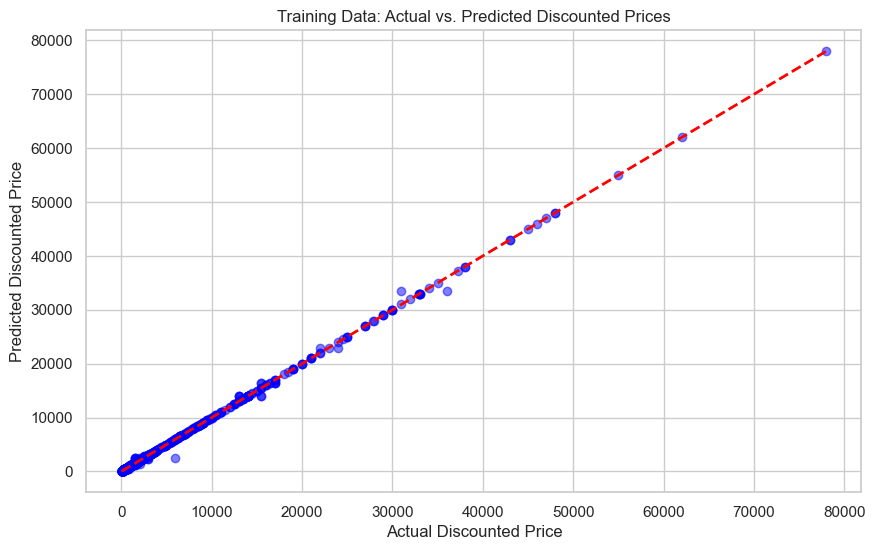

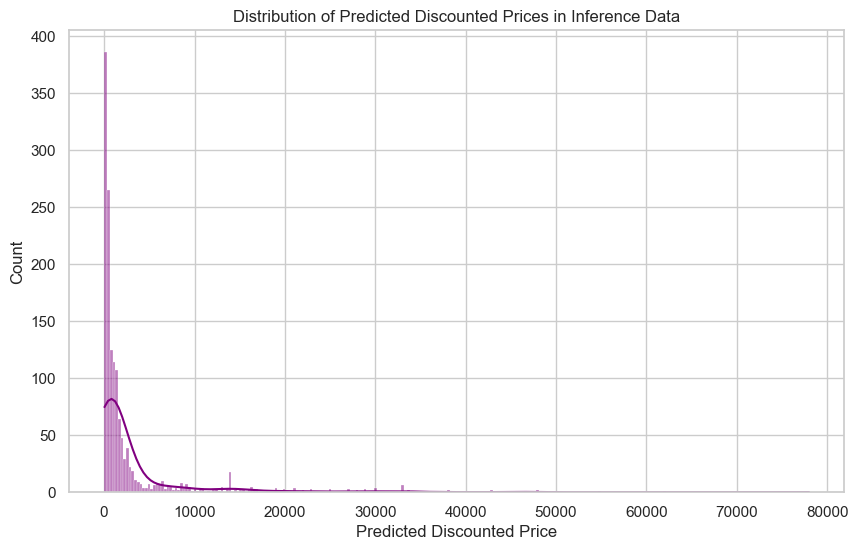

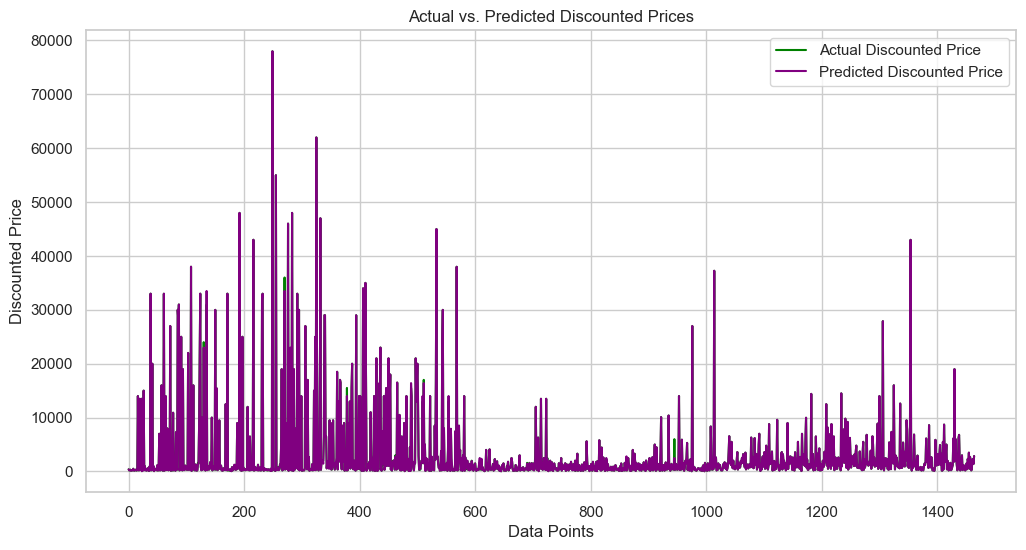

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up plot styles
sns.set(style="whitegrid")

# Plot 1: Scatter Plot for Training Data (Actual vs. Predicted)
def plot_training_results(train_data, model):
    # Extract features and target from training data
    X_train = train_data.drop(columns=["discounted_price"])
    y_train = train_data["discounted_price"]
    
    # Predict on the training set
    y_train_pred = model.predict(X_train)

    plt.figure(figsize=(10, 6))
    plt.scatter(y_train, y_train_pred, alpha=0.5, color="blue")
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--', color="red", linewidth=2)
    plt.xlabel("Actual Discounted Price")
    plt.ylabel("Predicted Discounted Price")
    plt.title("Training Data: Actual vs. Predicted Discounted Prices")
    plt.show()

# Plot 2: Histogram of Predicted Prices in Inference Data
def plot_inference_distribution(inference_data):
    plt.figure(figsize=(10, 6))
    sns.histplot(inference_data["predicted_discounted_price"], kde=True, color="purple")
    plt.xlabel("Predicted Discounted Price")
    plt.title("Distribution of Predicted Discounted Prices in Inference Data")
    plt.show()

# Plot 3: Line Plot to Compare Actual and Predicted Prices (if actual discounted prices are available)
def plot_actual_vs_predicted(train_data, inference_data):
    # If actual 'discounted_price' is available in training data
    plt.figure(figsize=(12, 6))
    
    # Plot actual discounted prices
    plt.plot(train_data.index, train_data["discounted_price"], label="Actual Discounted Price", color="green")
    
    # Plot predicted discounted prices
    plt.plot(inference_data.index, inference_data["predicted_discounted_price"], label="Predicted Discounted Price", color="purple")
    
    plt.xlabel("Data Points")
    plt.ylabel("Discounted Price")
    plt.title("Actual vs. Predicted Discounted Prices")
    plt.legend()
    plt.show()

# Run the visualizations
plot_training_results(train_data, model)
plot_inference_distribution(inference_data)
plot_actual_vs_predicted(train_data, inference_data)


In [46]:
# src/salespredictor/components/trial.py
import pandas as pd
from src.salespredictor.components.trial import fit_and_save_encoder, clean_and_preprocess_data

if __name__ == "__main__":
    # Load your dataset
    df = pd.read_csv("Data/amazon.csv")

    # Fit and save encoder
    fit_and_save_encoder(df)

    # Preprocess data for training
    processed_data = clean_and_preprocess_data(df, is_training=True)
    print(processed_data.head())  # To display the output for verification


Models directory created or verified at: models
Label encoder saved successfully.
Save directory created or verified at: processed_data
Actual price column cleaned and converted to float.
Discounted price column cleaned and converted to float.
Missing values in rating column handled.
Missing values in rating_count column handled.
For training, run fit_and_save_encoder() separately to fit and save the encoder.
Training data saved to processed_data\train_data.csv
   actual_price  rating  rating_count  category  discounted_price
0        1099.0     4.2    348.217791        10             399.0
1         349.0     4.0    348.217791        10             199.0
2        1899.0     3.9    348.217791        10             199.0
3         699.0     4.2    348.217791        10             329.0
4         399.0     4.2    348.217791        10             154.0


In [52]:
df = train_data

In [53]:
len(df)

1465